In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Cargando los datos

In [ ]:
# Datos cultivo de fresa, sanos vs enfermo
Data1 = pd.read_csv('/home/csilva/GIT/Tesis_Maestria/Data/fresa_solena/Data3/crop_vs_native_rawCounts_S.csv')
Data1

In [ ]:
# Datos de fresa con 5 categorias (Tipo de cultivo) 
Data2 = pd.read_csv('/home/csilva/GIT/Tesis_Maestria/Data/fresa_solena/Data3/crop_vs_native_rawCounts_S.csv')
Data2

In [ ]:
# Data1 y Data2 unidos para obtener las 8 categorias
Data = pd.read_csv('/home/csilva/GIT/Tesis_Maestria/Data/fresa_solena/Data3/crop_vs_native_rawCounts_S.csv')
Data

In [4]:
# Datos ... cultivo vs nativo
Data3 = pd.read_csv('/home/csilva/GIT/Tesis_Maestria/Data/fresa_solena/Data3/crop_vs_native_rawCounts_S.csv')
Data3.head()

,Unnamed: 0,category,Streptomyces.sp..WAC.01438,Streptomyces.sp..BJ20,Streptomyces.sp..HP.A2021,Streptomyces.sp..A144,Streptomyces.sp..Go.475,Streptomyces.sp..SS52,Streptomyces.sp..SGAir0924,Streptomyces.sp..SYP.A7193,...,Candida.orthopsilosis,Scheffersomyces.stipitis,Debaryomyces.hansenii,Brettanomyces.bruxellensis,Brettanomyces.nanus,Pichia.kudriavzevii,Saccharomycodes.ludwigii,Komagataella.phaffii,Schizosaccharomyces.pombe,Virgibacillus.pantothenticus
0,5QBDM2ESPNATXXX0494,native,233240,129804,94707,290193,81496,274248,270721,70538,...,0,0,0,0,0,0,0,0,0,0
1,5QBDM2ESPPOOBXX0490,crop,8843,8481,27911,6513,11102,5965,6525,5515,...,0,0,0,0,0,0,0,0,0,0
2,BR5r-M2-ESP-POO-B-XX-1621,crop,25366,22233,66424,10861,32401,9785,10244,17937,...,293,293,187,319,269,225,223,140,330,0
3,BR5rM2ESPNATXXX1625,native,16533,17902,63701,5872,23724,5133,5885,9282,...,0,146,0,118,0,0,0,0,0,0
4,MvvQ-M2-ESP-POO-A-XX-1616,crop,13077,13121,25183,5859,15504,4693,5221,8769,...,161,116,0,169,107,102,0,0,183,0


In [5]:
Data3.shape # 8 observaciones en 6023 variables

(8, 6023)

In [33]:
# datos de entrenamiento 
cont_names = list(Data3.drop(["category"], axis=1).columns)
y_names = ["category"]
train_df = Data3[cont_names+y_names]
train_df

,Unnamed: 0,Streptomyces.sp..WAC.01438,Streptomyces.sp..BJ20,Streptomyces.sp..HP.A2021,Streptomyces.sp..A144,Streptomyces.sp..Go.475,Streptomyces.sp..SS52,Streptomyces.sp..SGAir0924,Streptomyces.sp..SYP.A7193,Streptomyces.sp..CCM_MD2014,...,Scheffersomyces.stipitis,Debaryomyces.hansenii,Brettanomyces.bruxellensis,Brettanomyces.nanus,Pichia.kudriavzevii,Saccharomycodes.ludwigii,Komagataella.phaffii,Schizosaccharomyces.pombe,Virgibacillus.pantothenticus,category
1,5QBDM2ESPNATXXX0494,233240,129804,94707,290193,81496,274248,270721,70538,66676,...,0,0,0,0,0,0,0,0,0,native
2,5QBDM2ESPPOOBXX0490,8843,8481,27911,6513,11102,5965,6525,5515,13283,...,0,0,0,0,0,0,0,0,0,crop
3,BR5r-M2-ESP-POO-B-XX-1621,25366,22233,66424,10861,32401,9785,10244,17937,14573,...,293,187,319,269,225,223,140,330,0,crop
4,BR5rM2ESPNATXXX1625,16533,17902,63701,5872,23724,5133,5885,9282,7320,...,146,0,118,0,0,0,0,0,0,native
5,MvvQ-M2-ESP-POO-A-XX-1616,13077,13121,25183,5859,15504,4693,5221,8769,7031,...,116,0,169,107,102,0,0,183,0,crop
6,MvvQM2ESPNATXXX1620,10109,13092,18807,4562,11914,4401,4655,7215,6261,...,0,0,103,0,0,0,0,0,0,native
7,TZEpM2ESPNATXXX0504,3942,3962,5627,2488,4905,2146,2396,3120,2661,...,0,0,0,0,0,0,0,0,0,native
8,TZEpM2ESPPOOAXX0500,8744,11718,16954,4746,8638,4283,4666,5077,3854,...,0,0,0,0,0,0,0,0,791,crop


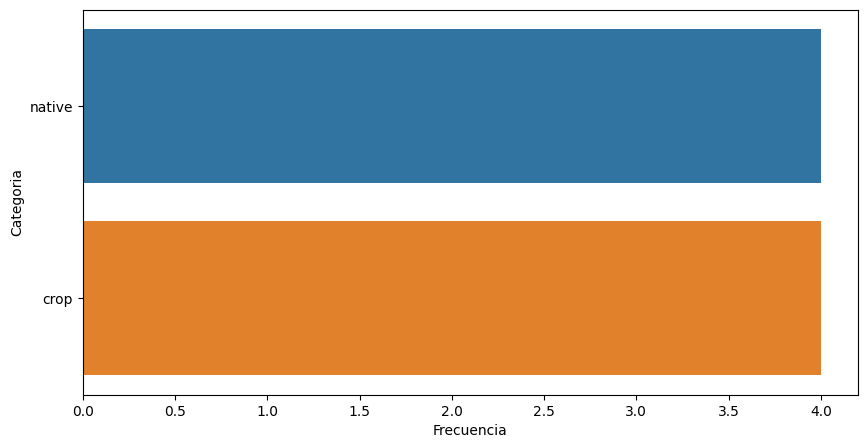

In [34]:
# grafica de distribución por categoria (tenemos las dos categorias balanceadas)
fig, ax = plt.subplots(1,1 ,figsize=(10, 5))
sns.countplot(data=train_df, y="category", order=train_df.category.value_counts().index)#, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Categoria")
plt.title("", fontsize=21)
plt.show()

In [35]:
train_df.rename(index={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8'}, inplace=True)
train_df.drop(['Unnamed: 0'], axis=1)
train_df.head()

,Unnamed: 0,Streptomyces.sp..WAC.01438,Streptomyces.sp..BJ20,Streptomyces.sp..HP.A2021,Streptomyces.sp..A144,Streptomyces.sp..Go.475,Streptomyces.sp..SS52,Streptomyces.sp..SGAir0924,Streptomyces.sp..SYP.A7193,Streptomyces.sp..CCM_MD2014,...,Scheffersomyces.stipitis,Debaryomyces.hansenii,Brettanomyces.bruxellensis,Brettanomyces.nanus,Pichia.kudriavzevii,Saccharomycodes.ludwigii,Komagataella.phaffii,Schizosaccharomyces.pombe,Virgibacillus.pantothenticus,category
1,5QBDM2ESPNATXXX0494,233240,129804,94707,290193,81496,274248,270721,70538,66676,...,0,0,0,0,0,0,0,0,0,native
2,5QBDM2ESPPOOBXX0490,8843,8481,27911,6513,11102,5965,6525,5515,13283,...,0,0,0,0,0,0,0,0,0,crop
3,BR5r-M2-ESP-POO-B-XX-1621,25366,22233,66424,10861,32401,9785,10244,17937,14573,...,293,187,319,269,225,223,140,330,0,crop
4,BR5rM2ESPNATXXX1625,16533,17902,63701,5872,23724,5133,5885,9282,7320,...,146,0,118,0,0,0,0,0,0,native
5,MvvQ-M2-ESP-POO-A-XX-1616,13077,13121,25183,5859,15504,4693,5221,8769,7031,...,116,0,169,107,102,0,0,183,0,crop


In [40]:
#otras representaciones de los datos
y = np.array(train_df[y_names]).ravel()
X = np.array(train_df.drop(y_names,axis=1)).astype('float')

ValueError: could not convert string to float: '5QBDM2ESPNATXXX0494'

## PCA - Análisis de componentes principales

Define un nuevo conjunto de variables (variables latentes), estas se definen como una suma de pesos (combinacion lineal de las variables originales) 
$$\chi =\sum_{i=1}^{n} \alpha x^{i}$$ 
$x \epsilon \mathbb{R}$, $n$ números de variables, $\alpha$ tal que maximicen la varianza de los datos

In [39]:
# PCA - Análisis de componentes principales
# solo recupera caractaristicas lineales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

X_std = StandardScaler().fit_transform(X)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_std) 
proj = pd.DataFrame(otus_pca.transform(X_std),columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'category': y})

# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['category'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

ValueError: could not convert string to float: '5QBDM2ESPNATXXX0494'

In [43]:
X_std = StandardScaler().fit_transform(X) # :(

ValueError: could not convert string to float: '5QBDM2ESPNATXXX0494'

In [41]:
# TSNE (t-Distributed Stochastic Neighbor Embedding)  
# Es un popular algoritmo de aprendizaje automático utilizado para la visualización de datos y la reducción de la dimensionalidad.
# Representacion recuperando caracteristicas no lineales
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50) #perplexity=50 este parametro puede cambiar 
#X_tsne = tsne.fit_transform(train_img)
#tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'digit': y_train})
X_tsne = tsne.fit_transform(X_std)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'clima': y})

NameError: name 'X_std' is not defined

In [42]:
# Grafica interactiva
fig = px.scatter(tsne_dataset, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

NameError: name 'tsne_dataset' is not defined

## Para la base Data1 ,queremos ver Fusarium vs los demas generos.

In [ ]:
#graficos de dispersion
sns.set()
sns.pairplot(Data1, hue='Treatment', height=2);


In [ ]:
#detectar 2 species???
spec2 = penguins['species'].copy()
spec2[spec2.eq('Adelie') | spec2.eq('Chinstrap')] = 'adel_chins'
penguins['species'] = spec2
penguins

In [ ]:
from sklearn.preprocessing import StandardScaler

col_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
x_peng = penguins[col_vars]

#estandarizar los datos(centrarlos y dividir entre su varianza)
ss = StandardScaler() 
scaled_x = ss.fit_transform(x_peng)
scaled_x = pd.DataFrame(ss.fit_transform(x_peng), columns=col_vars, index = penguins.index)
penguins_sc = pd.concat([scaled_x, penguins['species']], axis=1)

In [ ]:
#metodode aprendizaje no supervisado
sns.pairplot(penguins_sc, hue='species', height=2); 

In [ ]:
sns.relplot(x='bill_depth_mm', y='flipper_length_mm', hue='species', data=penguins_sc, height=5);